In [1]:
from mesh import Mesh

In [2]:
#minimal
#filename, quality_index = "Data/simplicial_donut_3.ply", 2
#small
#filename, quality_index = "Data/simplicial_donut_3_deform.ply", 2
#filename, quality_index = "Data/31_r1.00_n4_v256.volume.ply", 3
#filename, quality_index = "Data/31_r1.00_n4_v256.volume_r1.50_n4_v256.volume.ply", 3
#filename, quality_index = "Data/31_mean_curvature.ply", 7
#filename, quality_index = "Data/31_min_curvature_meshlab.ply", 7
#filename, quality_index = "Data/4125_mean_curv.ply", 7
#filename, quality_index = "Data/10354_mean_curv.ply", 7
#filename, quality_index = "Data/689_mean_curv.ply", 7
#filename, quality_index = "Data/475_mean_curv.ply", 7
#medium
#filename, quality_index = "Data/HS_0109_HeiCuBeDa_GigaMesh.ply", 3
#filename, quality_index = "Data/HS_0109_HeiCuBeDa_GigaMesh_mean_curvature.ply", 7
filename, quality_index = "Data/Messer_Stein/Messer_ohneNachv_GMOCF_r1.50_n4_v256.volume.ply", 3
#large:
#filename, quality_index = "Data/HS_190_HeiCuBeDa_GigaMesh.ply", 3

# Mesh class:
The Mesh class can be initialized using **Mesh()** . It has the following variables and functions:

## Variables:
- **Mesh.filename** filename as string. saved without .ply, but with folder structure

- **Mesh.Vertices** Vertices stored as a dictionary of Vertex objects, keys are Vertex indices

- **Mesh.Edges** Edges stored as a dictionary of Edge objects, keys are numbered

- **Mesh.Faces** Faces stored as a dictionary of Face objects, keys are numbered

- **Mesh.MorseComplex** if not calculated yet: None, otherwise a MorseComplex object with MorseComplex.persistence = 0

- **Mesh.reducedMorseComplexes** a dictionary of MorseComplex objects, that have been reduced by a persistence parameter. The persistence parameter also defines the key of each MorseComplex object

- **Mesh.MorseCells** a dictionary of MorseCells dictionaries. the key for each MorseCell dictionary is given by the persistence of the MorseComplex, these Cells were taken from. Each MorseCell dictionary consits of key, value pairs, where the key gives the label of a cell and the value is a set of vertices that make up this cell.

## Functions:
- **Mesh.load_mesh_ply(filename, quality_index)** loads a .ply file into the Mesh class and takes the value given at quality_index position as the scalar function on the vertices

- **Mesh.info()** prints out Mesh info

- **Mesh.ProcessLowerStars()** calculates the combinatorial gradient and critical simplices; **required for ExtractMorseComplex**

- **Mesh.only_return_ExtractMorseComplex** return MorseComplex without storing it in the Mesh class

- **Mesh.ExtractMorseComplex** calculate MorseComplex and store it in the Mesh class

- **Mesh.only_return_ReducedMorseComplex(persistence)** reduce the MorseComplex based on the given persistence parameter, but dont store it in the Mesh class

- **Mesh.ReducedMorseComplex(persistence)** reduce the MorseComplex based on the given persistence parameter, and store it in the Mesh class

- **Mesh.plot_MorseComplex(MorseComplex, filename, path_color=[255,0,255])** plots the critical simplices of a MorseComplex in red (vertex), green (edge) and blue (face) and the according paths connecting them in magenta. Only writes a ply file containing colored points, so should be used as an overlay for the original mesh

- **Mesh.ExtractMorseCells(MorseComplex)** takes a MorseComplex and gets all connected cells individually that are enclosed by the lines between critical simplices

- **Mesh.plot_MorseCells(persistence, filename)** plots the connected components in each Cell in the same color. Only writes a ply file containing colored points, so should be used as an overlay for the original mesh

Time read data file: 18.692749
Time read and prepare data: 44.1324829


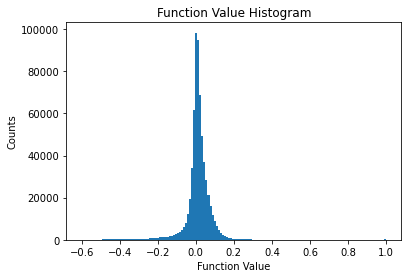

In [3]:
data = Mesh()
data.load_mesh_ply(filename, quality_index, inverted=False)
#data.info()
#data.load_new_funvals("Data/Messer_Stein/Messer_ohneNachv_GMOCF_r1.50_n4_v256.normal.mat")
#data.info()
data.plot_funval_histogram(nb_bins=150)

#data.ProcessLowerStars()
#data.ExtractMorseComplex()
#data.MorseComplex.info()

In [4]:
#data.write_funval_thresh_labels(15, str(data.filename))

In [5]:
#data.calculate_BettiNumbers()
#data.plot_PersistenceDiagram()

In [6]:
#data.ReduceMorseComplex(1000000)
#data.plot_salient_edge_histogram(100, log=True)

In [7]:
#thr = [1.3]
#min_thresh = 10
#max_thresh = 7
#for thresh in thr:
    #Mesh.plot_improved_salient_edge(str(data.filename)+"_improved_salient_edge_justSum"+str(thresh), 
    #                                thresh, min_thresh, max_thresh)
    #data.plot_salient_edge(str(data.filename), thresh)
    #data.plot_salient_edge_pline(str(data.filename), thresh)

In [8]:
# Calculate reduced Complexes for different persistence levels:

#persistences = [0.05,0.1]
#for persistence in persistences:
    # reduce morse complex persistence based
 #   data.ReduceMorseComplex(persistence)
    
    # plot MorseComplexes, calculate MorseCells and plot MorseCells
  #  reduced_complex = data.reducedMorseComplexes[persistence]
    #reduced_complex.info()
    #data.plot_MorseComplex(reduced_complex, str(data.filename))
    #thresholds = [0.1,0.15,0.2,0.25,0.3]
    #for abs_thresh in thresholds:
    #    data.plot_MorseComplex_thresholded(reduced_complex, 
    #                                       str(data.filename), 
    #                                       abs_thresh)
    #    data.plot_MorseComplex_thresholded_pline(persistence, 
    #                                             str(data.filename), 
    #                                             minimum_length=5, thresh=abs_thresh)
    
    #data.plot_MorseComplex_pline(persistence, str(data.filename))
   # data.ExtractMorseCells(reduced_complex)
    #data.write_MorseCellLabels(persistence, str(data.filename))
    #data.plot_MorseCells(persistence, str(data.filename))


In [9]:
'''
import itertools

pers = [0.1]
saledge_thresh = [1.25,1.5,1.6,1.7,1.8]
edge_percentage = [0.2,0.3,0.4]

for p, s, ep in list(itertools.product(pers, saledge_thresh, edge_percentage)):
    Segmentation = data.SalientEdgeSegmentation(p, s, ep)
    data.write_SegmentationLabels(p, s, ep, str(data.filename))
'''

'\nimport itertools\n\npers = [0.1]\nsaledge_thresh = [1.25,1.5,1.6,1.7,1.8]\nedge_percentage = [0.2,0.3,0.4]\n\nfor p, s, ep in list(itertools.product(pers, saledge_thresh, edge_percentage)):\n    Segmentation = data.SalientEdgeSegmentation(p, s, ep)\n    data.write_SegmentationLabels(p, s, ep, str(data.filename))\n'